In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import random_split
import pandas as pd
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import trange, tqdm
import os
from utils import *

In [2]:
batch_size=256
t = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0), std=(1))
                                    ])
cifar_train = torchvision.datasets.CIFAR10(root = './CIFAR10/' , train = True , download = True , transform = t)
cifar_test = torchvision.datasets.CIFAR10(root = './CIFAR10/' , train = False , download = True , transform = t)


train_loader = DataLoader(cifar_train,
                          batch_size = batch_size,
                          shuffle = True,
                          )
val_loader = DataLoader(cifar_test,
                        batch_size = batch_size,
                        shuffle = False,
                        )


Files already downloaded and verified
Files already downloaded and verified


In [3]:
model = AE().cuda()

In [4]:
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [11]:
with torch.no_grad():
    outs = torch.zeros((10000,2048),device="cuda")
    ys = torch.zeros(10000,device="cuda")
    for i,(X,y) in tqdm(enumerate(val_loader),total = len(val_loader)):
        out = model.encoder(X.cuda())
#         out = nn.functional.max_pool2d(out,(10,10),(5,5),padding = 0)
#         out = torch.flatten(out,start_dim=1)
#         print(out[0].shape)
        outs[batch_size*i:batch_size*(i+1),:]=out[0]
        ys[batch_size*i:batch_size*(i+1)] = y.cuda()

  0%|          | 0/40 [00:00<?, ?it/s]

In [12]:
SI_evaluation(outs, ys)

tensor(0.0853, device='cuda:0')

In [13]:
features, SIs = forward_selection(outs,ys)

  0%|          | 0/2048 [00:00<?, ?it/s]

best SI:0.12469999492168427 for 280


  0%|          | 0/2048 [00:00<?, ?it/s]

best SI:0.13759998977184296 for 282


  0%|          | 0/2048 [00:00<?, ?it/s]

best SI:0.13759998977184296 for 0
best features obtaied


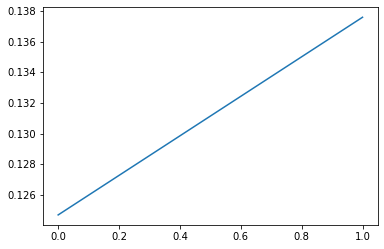

In [14]:
plt.plot(SIs)